In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)

env = gym.make('FrozenLake-v3')

Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = 0.99
num_episodes = 2000

rList = []


In [5]:
#random noise
for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n)/(i+1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state,:])
        
        rAll = reward
        state = new_state
        
    rList.append(rAll)

Success rate: 2.9505
Final Q-Table Values
[[0.94148015 0.         0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.         0.9801     0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


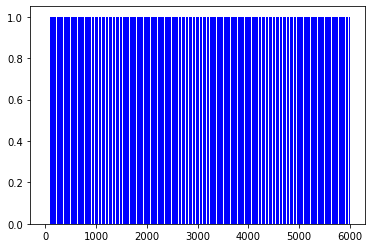

In [6]:
print('Success rate: ' + str(sum(rList)/num_episodes))
print('Final Q-Table Values')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()

In [8]:
# e-greedy
for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False
    while not done:
        # random explotation
        e = 1. / ((i //100) + 1)
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action =np.argmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state,:])
        
        rAll = reward
        state = new_state
        
    rList.append(rAll)

Success rate: 3.7505
Final Q-Table Values
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


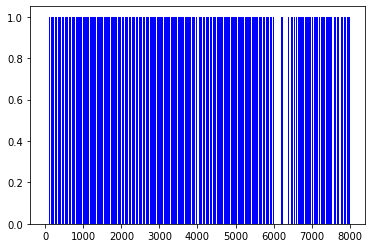

In [9]:
print('Success rate: ' + str(sum(rList)/num_episodes))
print('Final Q-Table Values')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()